In [1]:
from flash_ansr import FlashANSR, SoftmaxSamplingConfig, BeamSearchConfig, MCTSGenerationConfig, install_model, get_path
 
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from drawdata import ScatterWidget

In [3]:
MODEL = "psaegert/flash-ansr-v23.0-120M"

In [4]:
install_model(MODEL)

Installing model psaegert/flash-ansr-v23.0-120M to /home/psaegert/Projects/flash-ansr/models/psaegert/flash-ansr-v23.0-120M


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Model psaegert/flash-ansr-v23.0-120M installed successfully!


In [6]:
nsr = FlashANSR.load(
    directory=get_path('models', MODEL),
    generation_config=SoftmaxSamplingConfig(choices=1024 * 32),
    parsimony=0.05,
    prune_constant_budget=0.01,
).to(device)

In [7]:
widget = ScatterWidget()
widget

In [8]:
X_raw, y_raw = widget.data_as_X_y

# Scale X_raw and y_raw to (-10, 10)
X = (X_raw - X_raw.min(axis=0)) / (X_raw.max(axis=0) - X_raw.min(axis=0)) * 20 - 10
y = (y_raw - y_raw.min(axis=0)) / (y_raw.max(axis=0) - y_raw.min(axis=0)) * 20 - 10

In [9]:
nsr.fit(X, y, verbose=True)

Fitting Constants: 100%|██████████| 4448/4448 [00:04<00:00, 956.49it/s] 


In [10]:
nsr.get_expression()

'2.73 - (4.53 * atan(x1 - -0.76) + asinh((-8.94 + x1) * exp(x1) / -60.25))'

In [11]:
# Optional: Re-compile with different parsimony
nsr.compile_results(parsimony=0.05)

In [17]:
nsr.results.head(10)

,log_prob,fvu,score,expression,complexity,requested_complexity,raw_beam,beam,raw_beam_decoded,function,refiner,prompt_metadata,pruned_variant,beam_id,fit_constants,fit_covariances,fit_loss
0,-21.248711,0.022506,-0.747693,"[-, <constant>, +, *, <constant>, atan, -, x1,...",18,None,"[1, 9, 29, 6, 28, 30, 6, 49, 29, 66, 6, 53, 30...","[29, 6, 28, 30, 6, 49, 29, 66, 6, 53, 30, 28, ...","[-, <constant>, +, *, <constant>, atan, -, x1,...",<function <lambda> at 0x7cb74eb9cfe0>,"Refiner(expression=['-', '<constant>', '+', '*...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,0,"[2.7346348181326885, 4.525400327543584, -0.756...","[[0.009072855365380886, 0.0004573816541657585,...",0.931172
1,-24.741018,0.025022,-0.701682,"[-, <constant>, -, pow5, asinh, *, <constant>,...",18,None,"[1, 9, 29, 6, 29, 39, 53, 30, 6, 52, 66, 30, 4...","[29, 6, 29, 39, 53, 30, 6, 52, 66, 30, 44, 29,...","[-, <constant>, -, pow5, asinh, *, <constant>,...",<function <lambda> at 0x7cb833acc5e0>,"Refiner(expression=['-', '<constant>', '-', 'p...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,1,"[1.2713977934562124, 2.0904194619830276, 2.267...","[[0.01017972266476873, -0.0003866467869759242,...",1.035241
2,-151.012894,0.020266,-0.693223,"[-, +, x1, *, asinh, -, atan, x1, <constant>, ...",20,None,"[29, 28, 66, 30, 53, 29, 49, 66, 6, 29, 53, 30...","[29, 28, 66, 30, 53, 29, 49, 66, 6, 29, 53, 30...","[-, +, x1, *, asinh, -, atan, x1, <constant>, ...",<function <lambda> at 0x7cb82b7258a0>,"Refiner(expression=['-', '+', 'x1', '*', 'asin...","{'allowed_terms': [], 'include_terms': [], 'ex...",True,2,"[-2.3432120163805, -8.96055699162102, -1.57398...","[[0.00026031614219571356, -0.00013213672650187...",0.838495
3,-194.200409,0.041781,-0.679026,"[pow5, atan, +, x1, pow1_3, pow1_3, sinh, +, x...",14,None,"[39, 49, 28, 66, 41, 41, 50, 28, 66, 30, 66, 2...","[39, 49, 28, 66, 41, 41, 50, 28, 66, 30, 66, 2...","[pow5, atan, +, x1, pow1_3, pow1_3, sinh, +, x...",<function <lambda> at 0x7cb82b455e40>,"Refiner(expression=['pow5', 'atan', '+', 'x1',...","{'allowed_terms': [], 'include_terms': [], 'ex...",True,3,[12.588615704729328],[[0.0004819415432163171]],1.728612
4,-24.741623,0.023900,-0.671603,"[-, <constant>, +, x1, *, x1, +, cos, -, <cons...",19,None,"[1, 9, 29, 6, 28, 66, 30, 66, 28, 45, 29, 6, 5...","[29, 6, 28, 66, 30, 66, 28, 45, 29, 6, 52, 66,...","[-, <constant>, +, x1, *, x1, +, cos, -, <cons...",<function <lambda> at 0x7cb833bd6520>,"Refiner(expression=['-', '<constant>', '+', 'x...","{'allowed_terms': [], 'include_terms': [], 'ex...",False,4,"[0.6115881833643856, -7.416042191055858, 4.036...","[[0.009848626294049914, 0.001180684288869011, ...",0.988827
5,-208.212372,0.026958,-0.669318,"[-, *, <constant>, +, <constant>, pow1_5, -, <...",18,None,"[29, 30, 6, 28, 6, 43, 29, 6, 30, 56, 66, 29, ...","[29, 30, 6, 28, 6, 43, 29, 6, 30, 56, 66, 29, ...","[-, *, <constant>, +, <constant>, pow1_5, -, <...",<function <lambda> at 0x7cb82b9aa2a0>,"Refiner(expression=['-', '*', '<constant>', '+...","{'allowed_terms': [], 'include_terms': [], 'ex...",True,5,"[-0.9369636766067851, -2.135458708679794, -2.3...","[[0.0006842100253960521, -0.001993992117396364...",1.115333
6,-174.953430,0.026985,-0.668880,"[-, -, *, <constant>, pow1_5, -, <constant>, *...",18,None,"[29, 29, 30, 6, 43, 29, 6, 30, 56, 66, 29, 66,...","[29, 29, 30, 6, 43, 29, 6, 30, 56, 66, 29, 66,...","[-, -, *, <constant>, pow1_5, -, <constant>, *...",<function <lambda> at 0x7cb82b957740>,"Refiner(expression=['-', '-', '*', '<constant>...","{'allowed_terms': [], 'include_terms': [], 'ex...",True,6,"[-0.9379762606245043, -2.422002646817084, 8.93...","[[0.0006864393550043343, 0.0005449689262767284...",1.116459
7,-149.621811,0.031206,-0.655761,"[-, -, *, exp, *, <constant>, x1, cos, +, <con...",17,None,"[29, 29, 30, 56, 30, 6, 66, 45, 28, 6, 66, 30,...","[29, 29, 30, 56, 30, 6, 66, 45, 28, 6, 66, 30,...","[-, -, *, exp, *, <constant>, x1, cos, +, <con...",<function <lambda> at 0x7cb82b8c3240>,"Ref

In [13]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

In [14]:
y_pred = [[nsr.predict(X, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]
y_pred_linspace = [[nsr.predict(X_linspace, nth_best_beam=beam_id, nth_best_constants=fit_id) for fit_id in range(len(result['fits'])) if np.isfinite(result['score'])] for beam_id, result in enumerate(nsr._results)]

/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operators.py:130: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 3), x ** (1 / 3))
/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operators.py:173: RuntimeWarning: invalid value encountered in power
  x = np.where(x < 0, -(-x) ** (1 / 5), x ** (1 / 5))
/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operators.py:522: RuntimeWarning: overflow encountered in exp
  return np.exp(x)
/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operators.py:33: RuntimeWarning: divide by zero encountered in divide
  return x / y
/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operators.py:378: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x)
/home/psaegert/miniconda3/envs/flash-ansr-12/lib/python3.12/site-packages/simplipy/operato

In [15]:
y_pred = y_pred[:32]
y_pred_linspace = y_pred_linspace[:32]

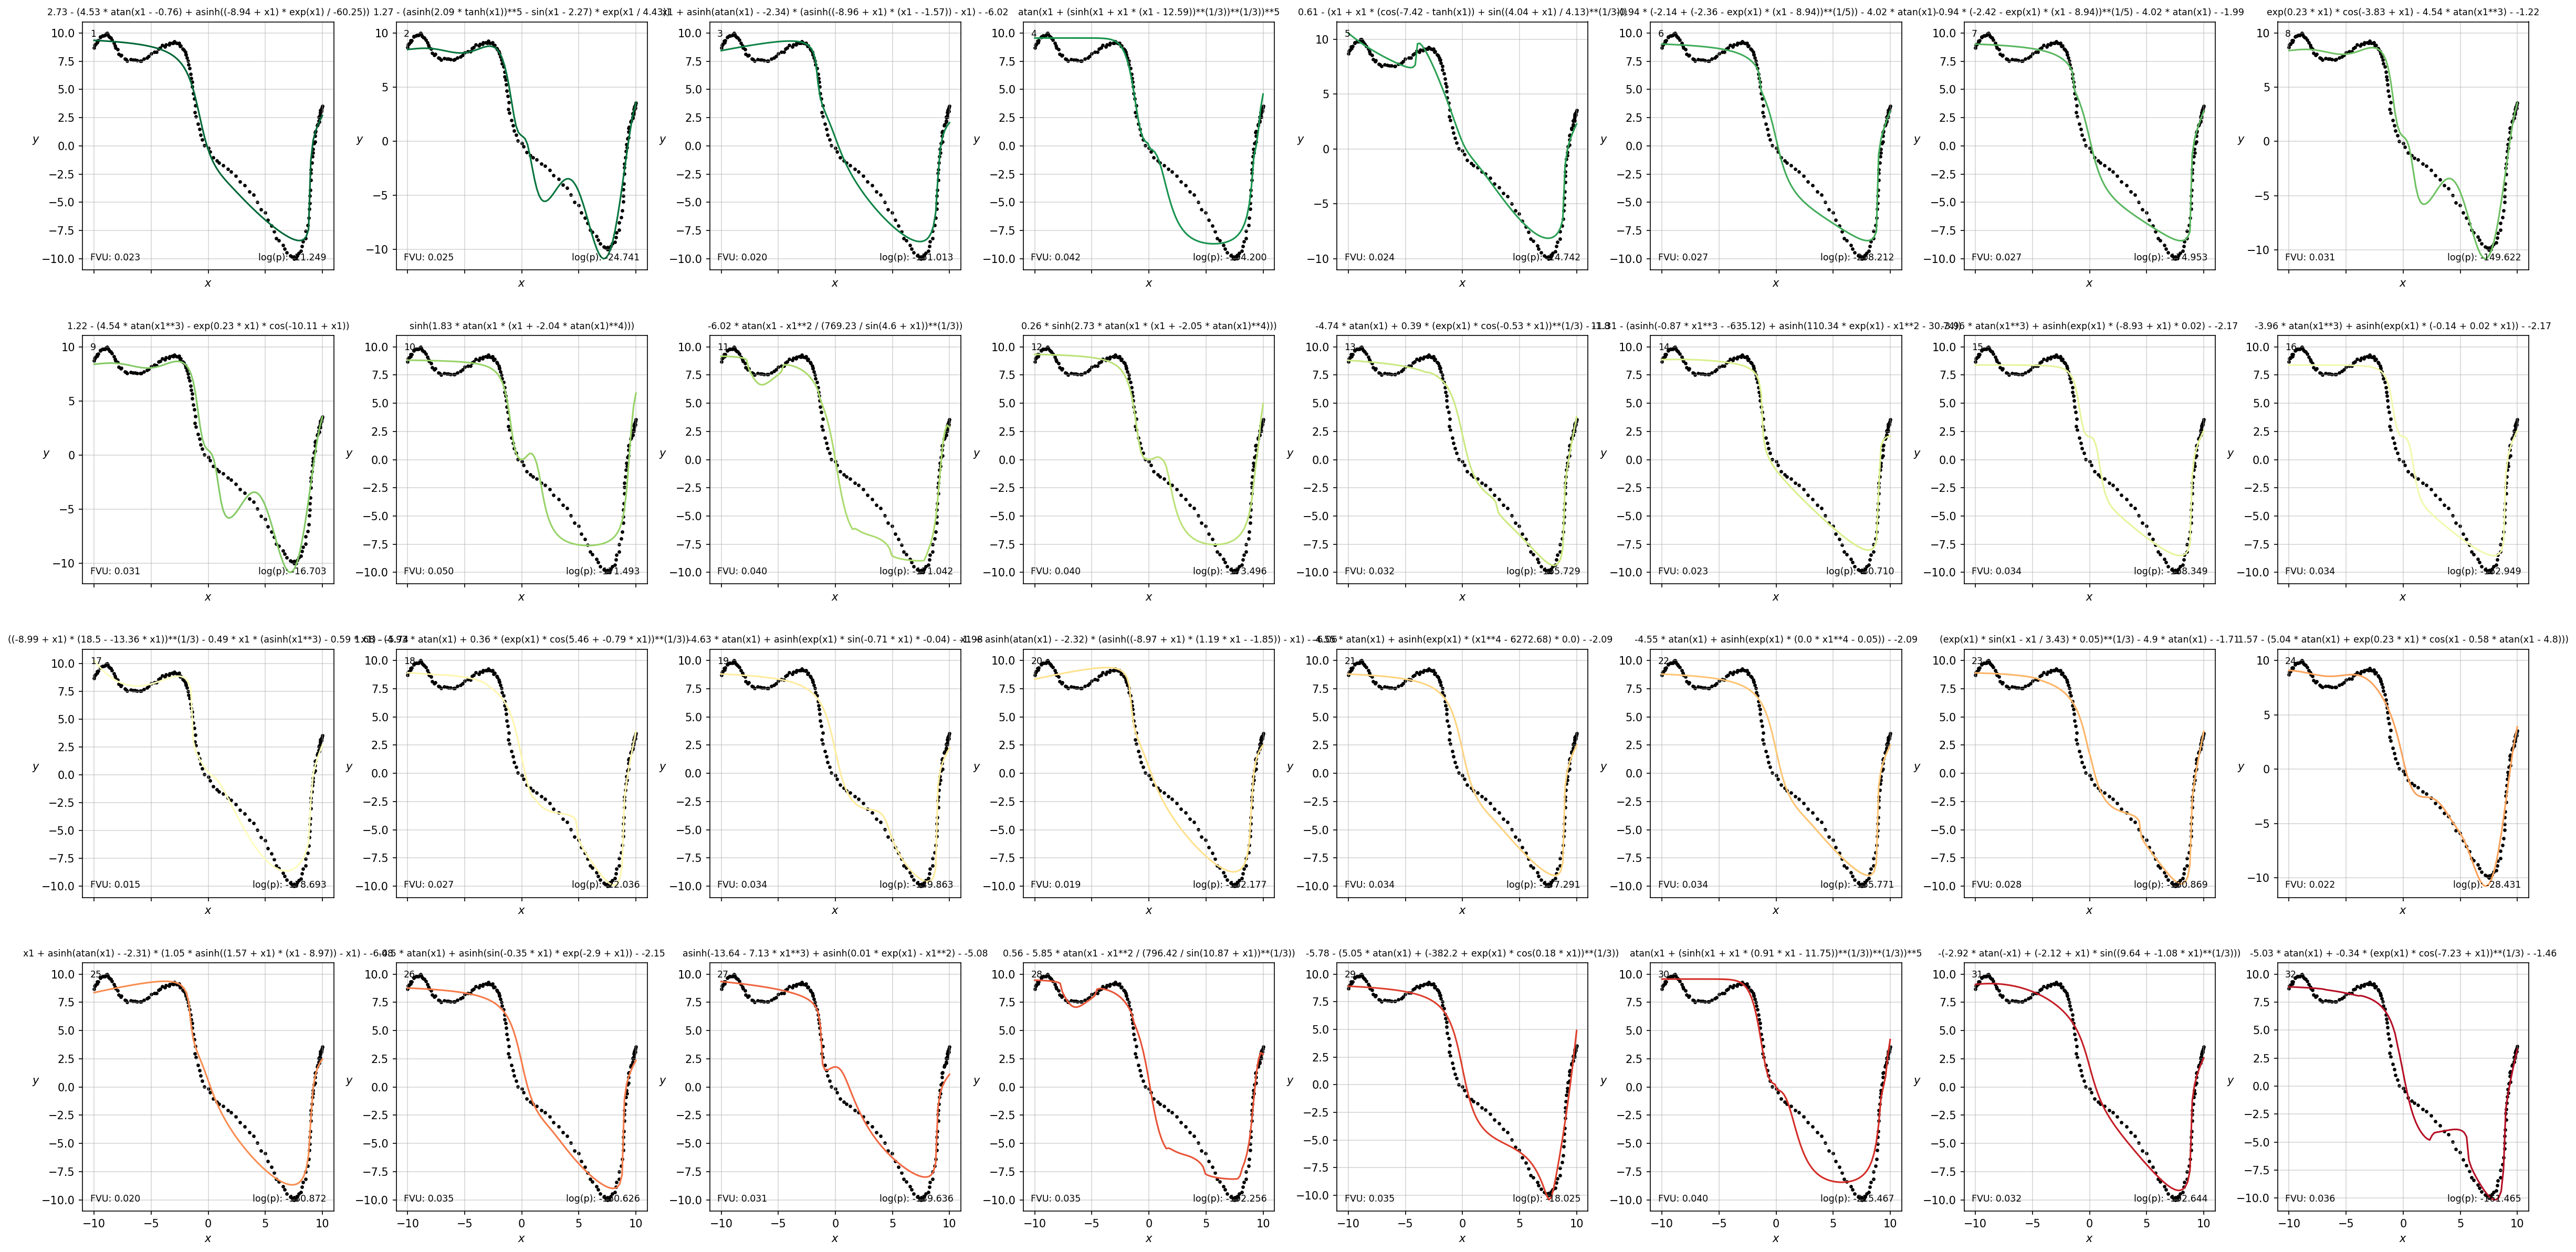

In [16]:
COLS = 8
ROWS = np.ceil(len(y_pred) / COLS).astype(int)

fig, axs = plt.subplots(ROWS, COLS, figsize=(COLS * 4, ROWS * 4), dpi=150, sharex=True)

for i, ax in enumerate(axs.flat):
    if i >= len(y_pred) or len(y_pred[i]) == 0:
        ax.axis('off')
        continue
    fvu = np.mean((y_pred[i][0][:, 0] - y)**2) / np.var(y)
    expression_pred_transformed = nsr._results[i]['refiner'].transform(nsr._results[i]['expression'], 0, return_prefix=True)
    expression_pred_transformed_infix = nsr.simplipy_engine.prefix_to_infix(expression_pred_transformed, power='**')

    ax.plot(X_linspace, y_pred_linspace[i][0], color=plt.get_cmap('RdYlGn')(1 - i / len(y_pred)))
    ax.scatter(X, y, color='k', s=5)
    ax.set_title(expression_pred_transformed_infix, fontsize='small')
    
    ax.annotate(f'{i + 1}', xy=(0.03, 0.97), xycoords='axes fraction', ha='left', va='top', fontsize='small')
    ax.annotate(f'FVU: {fvu:.3f}', xy=(0.03, 0.03), xycoords='axes fraction', ha='left', va='bottom', fontsize='small')
    ax.annotate(f'log(p): {nsr._results[i]["log_prob"]:.3f}', xy=(0.97, 0.03), xycoords='axes fraction', ha='right', va='bottom', fontsize='small')

    ax.grid(alpha=0.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$', rotation=0, labelpad=5)

fig.tight_layout(h_pad=3)